In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Tranfer Learning**

**Surely Someone Spend Time For Crafting The Right Module**

# **Why:**

**Leverage Existing Neural Network Architecture**

**Leverage The Working Neural Network Architecture**

**In Fine Tuning, Top Layers Got Unfrozen and Fine Tuned On Custom Data**

**Fine Tuning Usually Require More Data Than Feature Extraction** 

In [2]:
!nvidia-smi  # (To Check Whether We Used GPU or Not)

Tue Feb 22 17:41:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Import Script Of Helper Function**

**Goto Github Extras Folder and Here we get Previous Helper Functions**

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-22 17:41:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-22 17:41:10 (80.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Instead Of Rewriting The Function, Just Download or Import The Function
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# **Download & Turning Images**

**We Used Pretrained Model Using Tf.keras.application and Apply Them To our Own model Problem** 

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2022-02-22 17:41:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.251.16.128, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  71.9MB/s    in 2.2s    

2022-02-22 17:41:12 (71.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
# Check Out Image & Subdirectories

walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [7]:
# Create training and test directories
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_dir_10_percent

'10_food_classes_10_percent/train/'

In [10]:
# Check Out Class Names

train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
# See An Example Of Batch Of Data

for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [2.00000000e+00 2.00000000e+00 2.00000000e+00]
   ...
   [1.03877735e+01 8.10205936e+00 1.38777375e+00]
   [1.05714283e+01 8.28571415e+00 1.59184039e+00]
   [9.35710812e+00 7.07139349e+00 9.48974550e-01]]

  [[1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [2.00000000e+00 2.00000000e+00 2.00000000e+00]
   ...
   [6.37754154e+00 1.01836548e+01 5.33674383e+00]
   [6.28571415e+00 1.00000000e+01 6.42859745e+00]
   [6.51018429e+00 1.02244701e+01 8.51018429e+00]]

  [[1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [2.00000000e+00 2.00000000e+00 2.00000000e+00]
   ...
   [9.92854881e+00 1.17040539e+01 1.80611372e+00]
   [9.05102921e+00 1.07142859e+01 4.62248516e+00]
   [1.07142849e+01 1.17142859e+01 8.39798450e+00]]

  ...

  [[3.79286156e+01 2.79286156e+01 1.59286156e+01]
   [3

# **Discussing Model Experiments**

**We Work Through 5 Different Models With Different Data, Preprocessing & Models**

# **Keras Sequential vs Functional API**

**These Are Similarities in compiling , Fitting & Evaluating.**

**The Difference Is Model Construction(Fundamental API is More Flexible)**

**Building Tranfer Learning Model Using Keras (Feature Extraction) Functional API**

**Functional API gives us More Flexibility Then Our Model**


In [12]:
# 1- Create Base Model With Tf keras Applications

base_model = tf.keras.applications.EfficientNetB0(include_top=False)


# 2- Freeze The Base Model (Because Of Feature Extraction)

base_model.trainable = False

# 3- Create Input Into Our Model 

inputs = tf.keras.layers.Input(shape=(224,224,3),
                               name='input_layer')

#4- If You Are Using RESNET 50 V2 , You Need to Normalize Inputs (Not For Efficient Net)

# x = tf.keras.layers.Experimental.preprocessing.Rescaling(1./255) (inputs)

# 5- Pass The Inputs To The Base Model

x = base_model(inputs)
print(f"Shape After Passing Inputs Through Base Model : {x.shape}")

# 6- Average Pool The Output of the Base Model

x = tf.keras.layers.GlobalAveragePooling2D(name= 'global_average_pooling_layer') (x)

# 7- Create Output Activation Layer

outputs = tf.keras.layers.Dense(10, activation='softmax',
                                name = 'output_layer') (x)


# 8- Combine The Inputs With Outputs A Model

model_0 = tf.keras.Model(inputs, outputs)

# 9- Compile For Model

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10- Fit The Model

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name='Transfer_Learning',
                                                                          experiment_name = '10_percent_feature_extraction')])

16719872/16705208 [==============================] - 0s 0us/step
Shape After Passing Inputs Through Base Model : (None, 7, 7, 1280)
Saving TensorBoard log files to: Transfer_Learning/10_percent_feature_extraction/20220222-174127
Epoch 1/5
24/24 [==============================] - 21s 221ms/step - loss: 1.8876 - accuracy: 0.3840 - val_loss: 1.3356 - val_accuracy: 0.7204
Epoch 2/5
24/24 [==============================] - 4s 149ms/step - loss: 1.1450 - accuracy: 0.7453 - val_loss: 0.9009 - val_accuracy: 0.8158
Epoch 3/5
24/24 [==============================] - 5s 183ms/step - loss: 0.8314 - accuracy: 0.8213 - val_loss: 0.7568 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 5s 183ms/step - loss: 0.6838 - accuracy: 0.8413 - val_loss: 0.6647 - val_accuracy: 0.8289
Epoch 5/5
24/24 [==============================] - 5s 182ms/step - loss: 0.5870 - accuracy: 0.8573 - val_loss: 0.6130 - val_accuracy: 0.8388


In [13]:
# Evaluate The Full Test Dataset

model_0.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6079 - accuracy: 0.8372


[0.6079081296920776, 0.8371999859809875]

In [14]:
# Check The layers On Our Base Model

for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer)

0 <keras.engine.input_layer.InputLayer object at 0x7f103a51eb10>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f1038c67710>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7f1038cf3250>
3 <keras.layers.convolutional.ZeroPadding2D object at 0x7f1038c67c90>
4 <keras.layers.convolutional.Conv2D object at 0x7f1038caa190>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1038cc1d90>
6 <keras.layers.core.activation.Activation object at 0x7f1038caa310>
7 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f1038bafc10>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1037e22310>
9 <keras.layers.core.activation.Activation object at 0x7f1037e30f50>
10 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1037e36c50>
11 <keras.layers.core.reshape.Reshape object at 0x7f1037e3b4d0>
12 <keras.layers.convolutional.Conv2D object at 0x7f1037e40110>
13 <keras.layers.convolutional

In [15]:
# Summary Of Base Model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [16]:
# Summary Of Our Own Model

model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


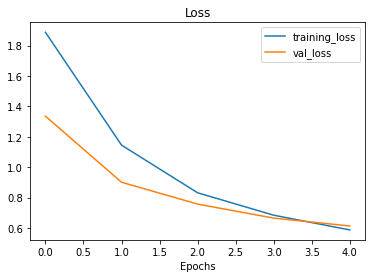

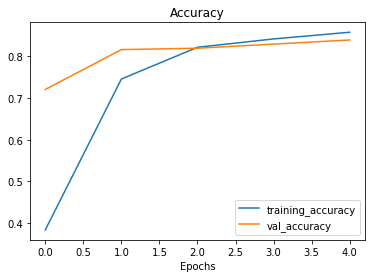

In [17]:
# Check Out Model's Training Curves

plot_loss_curves(history_10_percent)

# **Getting Feature Vector From Trained Model**


**lets Demonstrate Global Pooling 2D layers:**

**We Replicate (none,7,7,1280) to (none,1280)**

**Lets Use Similar Shaped of (1,4,4,3) and Pass it Global Average Pooling 2D**


In [18]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [19]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# **Drilling Into Concept Of Feature Vector**

**Feature Vector is Learned Representation Of Input Data (Compressed from Input Data)**



# **Downloading & Preparing Data For Model 1**

**Running A Series Of Transfer Learning Experiment**

**Model-1 Using Feature Extraction Transfer Learning with 1% of Transfer of Training Data With Data Augmentation**

**Note:Throughout All Experiment The Same Dataset Will be Used To evaluate Our Model**

**Model-2 : Use Feature Extraction Transfer Learning With 10% of Training Data With Data Augmentation**

**Model-3 : Use Fine Tuning Transfer Learning on 10% of Training Data With Data Augmentation**

**Model-4 : Use Fine Tuning Transfer Learning with 100% Of Training Data**


In [20]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2022-02-22 17:42:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 172.217.1.208, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  75.6MB/s    in 1.7s    

2022-02-22 17:42:22 (75.6 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
# Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There a

In [22]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # default
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **Building Data Augmentation Layer**

**To Add Data Augmentation Right Into Our Model, We Can Use The Layers Inside:**

**tf.keras.layers.Experimental.Preprocessing()**


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

**Data Augmentation is Automatically Turned On Training Data But Turned Off On Test Data**


# **Visualize What Happens When Image Passes Through Data Augmentation Layer**


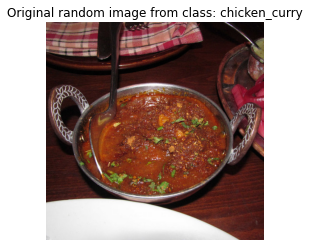

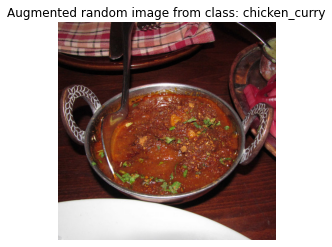

In [24]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);


# **Building Model No 1 (With data Augmented Layer)**

In [30]:
# Setup Input Shape

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

# Create Input layer

inputs - layers.Input(shape= input_shape, name = 'input_layer')

# Add in Data Augmentation Sequential Model As layer

x = data_augmentation(inputs)

# Give Base Model The Input And Don't Train it

x= base_model(x,training=False)

# Pool Output Feature Of Base Model

x= layers.GlobalAveragePooling2D()(x)

# Put A Dense Layer On as The Output

outputs = layers.Dense(10, activation='softmax', name='output_layer') (x)

# Make A Model Using Inputs & Outputs 

model_1 = keras.Model(inputs, outputs)

# Compile The Model

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit The Model

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name= 'Transfer_Learning',
                                                                         experiment_name = '1_Percent_data_Aug')])

Saving TensorBoard log files to: Transfer_Learning/1_Percent_data_Aug/20220222-174624
Epoch 1/5
3/3 [==============================] - 9s 2s/step - loss: 2.3233 - accuracy: 0.1857 - val_loss: 2.1700 - val_accuracy: 0.2516
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.0666 - accuracy: 0.3000 - val_loss: 2.0533 - val_accuracy: 0.3207
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9521 - accuracy: 0.3714 - val_loss: 1.9421 - val_accuracy: 0.3898
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.6820 - accuracy: 0.6429 - val_loss: 1.8759 - val_accuracy: 0.4227
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6176 - accuracy: 0.6143 - val_loss: 1.7851 - val_accuracy: 0.4770


In [26]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [34]:
# Evaluate On Full test Dataset 

result_1_percent_data_aug = model_1.evaluate(test_data)
result_1_percent_data_aug

79/79 [==============================] - 6s 71ms/step - loss: 1.7847 - accuracy: 0.4696


[1.7846611738204956, 0.46959999203681946]

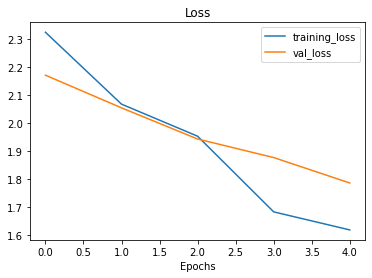

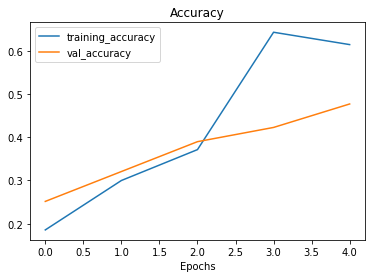

In [35]:
# 1 % Of Loss Curves

plot_loss_curves(history_1_percent)

# **Model No 2 : Feature Extraction With 10% Of Data**

In [36]:
# Get 10 % of Data

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# unzip_data('10_food_classes_10_percent')

In [37]:
train_data_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [38]:
# Set Data Inputs

import tensorflow as tf
IMG_SIZE= (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size = IMG_SIZE
                                                                            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [39]:
data_augmentation.summary()

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, None, None, 3)     0         
                                                                 
 random_rotation (RandomRota  (None, None, None, 3)    0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, None, None, 3)     0         
                                                                 
 random_height (RandomHeight  (None, None, None, 3)    0         
 )                                                               
                                                                 
 random_width (RandomWidth)  (None, None, None, 3)     0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable

# **Create Model No 2 With Data Augmentation Build In**

In [60]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# **Creating Model Checkpoint Callback**

**Callback are tool which can add helpful functionality to your model During training**

**A Model Checkpoint callback immediately saves our model during training. This is Useful to save our model**


In [61]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

# **Fitting and Evaluating Model No 2**

In [62]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("Transfer_Learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])

Saving TensorBoard log files to: Transfer_Learning/10_percent_data_aug/20220222-183623
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0615 - accuracy: 0.2747
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 359ms/step - loss: 2.0615 - accuracy: 0.2747 - val_loss: 1.5131 - val_accuracy: 0.6332
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3937 - accuracy: 0.6440
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 349ms/step - loss: 1.3937 - accuracy: 0.6440 - val_loss: 1.0728 - val_accuracy: 0.7418
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0720 - accuracy: 0.7360
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 7s 271ms/step - loss: 1.0720 - accuracy: 0.7360 - val_loss: 0.8869 - val_accuracy: 0.7780
Epo

In [71]:
# Check Model 2 Results on All test data

result_10_percent_data_aug = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 6s 70ms/step - loss: 0.6973 - accuracy: 0.8128


[0.6973062753677368, 0.8127999901771545]

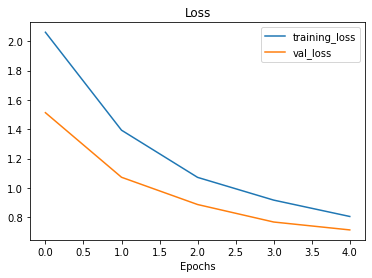

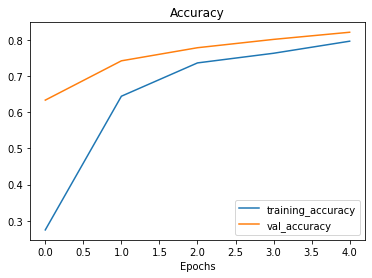

In [72]:
# Plot Loss  Curves

plot_loss_curves(history_10_percent_data_aug)

# **Loading and Compairing Saved Weights**

**loading In Check Pointed Weights Return a model to specific Checkpoint**

In [82]:
# Evaluate Model Model 2 With Loaded Weights

loaded_weights_model_result = model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.6973 - accuracy: 0.8128


In [74]:
result_10_percent_data_aug == loaded_weights_model_result

False

In [83]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(result_10_percent_data_aug), np.array(loaded_weights_model_result))

array([ True,  True])

In [84]:
print(np.array(result_10_percent_data_aug) - np.array(loaded_weights_model_result))


[5.96046448e-08 0.00000000e+00]


# **Model No 3 (Fine Tuning With 10% Of Data)**

**In Fine Tuning, We Unfrooze Few Layer. Fine Tuned On Custom data**

**Fine Tuning Usually Works Best Offer Training Features Vectors**



In [85]:
# Layers In Loaded Model

model_2.layers

In [86]:
# Are These Layers Trainable

for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0e908424d0> True
<keras.engine.sequential.Sequential object at 0x7f0e9082f350> True
<keras.engine.functional.Functional object at 0x7f0e91d2bb50> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f0e90839f50> True
<keras.layers.core.dense.Dense object at 0x7f0fa096ba50> True


In [87]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name, layer.trainable) 

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_re

In [88]:
# How Many Trainable Variables Are in Base Model?

print(len(model_2.layers[2].trainable_variables))

0


In [89]:
# Summary of The Model

model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [90]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_re

In [105]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [106]:
# Check Which Layer Are Tuneable (Trainable)

for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_re

**When You are Using Fine Tuning, Its Best Practice To Lower Your Learning rate By Some Amount. This is Hyperparameters You can tune But a Good Rule of thumb is at least 10x**


**A Good Resource is ULMFIT Research Paper**



In [101]:
print(len(model_2.trainable_variables))

12


In [109]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220222-191645
Epoch 5/10
24/24 [==============================] - 13s 308ms/step - loss: 0.2286 - accuracy: 0.9333 - val_loss: 0.5680 - val_accuracy: 0.8125
Epoch 6/10
24/24 [==============================] - 7s 301ms/step - loss: 0.2140 - accuracy: 0.9387 - val_loss: 0.4719 - val_accuracy: 0.8421
Epoch 7/10
24/24 [==============================] - 6s 222ms/step - loss: 0.1961 - accuracy: 0.9547 - val_loss: 0.5026 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 5s 213ms/step - loss: 0.1983 - accuracy: 0.9440 - val_loss: 0.4717 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 7s 288ms/step - loss: 0.1633 - accuracy: 0.9587 - val_loss: 0.4435 - val_accuracy: 0.8553
Epoch 10/10
24/24 [==============================] - 6s 214ms/step - loss: 0.1645 - accuracy: 0.9507 - val_loss: 0.4981 - val_accuracy: 0.8503


In [110]:
# Evaluate The Fine Tuned Model

result_fine_tune_10_percent = model_2.evaluate(test_data)
result_10_percent_data_aug

79/79 [==============================] - 6s 71ms/step - loss: 0.4808 - accuracy: 0.8464


[0.6973062753677368, 0.8127999901771545]

# **Compairing Our Model Results**

**The Plot Loss Function Works Great With Model Which Have Only Been Fit once. However we want to compare one Series of Running Fit With Another**




In [125]:
# Lets Create Function To Compare Training Histories

def compare_historys(original_history, new_history, inital_epochs):
  '''
  Compare Two Tensorflow History Objects
  '''

  # Get Original History Measurments

  acc = original_history.history['accuracy']
  loss = original_history.history['loss']
  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']


  # Combine Original History Metrics With New History Metrics

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]


  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')


  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()


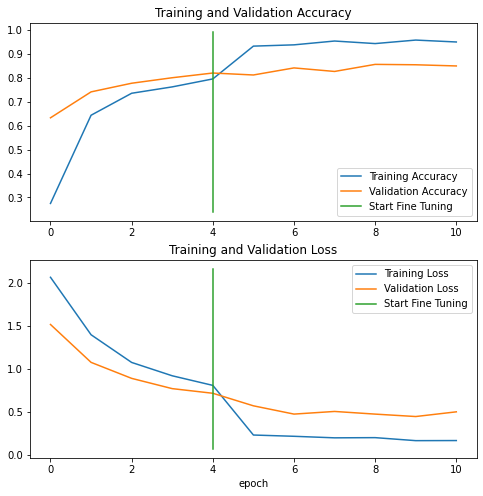

In [126]:
compare_historys(history_10_percent_data_aug, history_fine_10_percent_data_aug, inital_epochs=5)

# **Model No 4. The Last  Model In Fine Tuning**

In [127]:
# Model No 4 Fine Tuning and  Existing Model Of All Data

# Download & Unzip Data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2022-02-22 20:21:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 172.217.0.48, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  85.0MB/s    in 6.0s    

2022-02-22 20:21:34 (83.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [128]:
# Setup Training and Test Dir

train_dir_all_data = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [130]:
#How many Images Are We Working With

walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [131]:
#Setup Data Input 

import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode='categorical',
                                                                                 image_size= IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode ='categorical',
                                                                image_size= IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **Prepraing Our Final Model Experiments**


**Evaluate Model 2 (This is Fine-Tuned on 10 Percent of data Version)**

In [132]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 88ms/step - loss: 0.4808 - accuracy: 0.8464


[0.4808498024940491, 0.8464000225067139]

In [133]:
result_fine_tune_10_percent

[0.4808497130870819, 0.8464000225067139]

**To Train Fine Tuning Model (Model_4) , We need To revert model 2 Back to its Feature Extraction We need to revert Model 2 Back To its Feature Extraction Weights**

In [134]:
# Load Weights From Checkpoint

model_2.load_weights(checkpoint_path)

In [135]:
# Lets Evaluate Model 2 now 

model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.6973 - accuracy: 0.8128


[0.6973060369491577, 0.8127999901771545]

In [136]:
# Check To see if Our Model 2 Has Been Reverted Back to Feature Extraction Results

result_10_percent_data_aug

[0.6973062753677368, 0.8127999901771545]

# **Alright, The Previous Steps Might Seen Quite Confusing but all we have done is:**

**1- Trained A Feature Extraction Transfer Learning Model For 5 Epochs on 10% of Data With data Augmentation (Model No 2) and We Saved Model's Weight Using Model Checkpoint Callback**

**2- Fine Tuned The Same Model on the same 10% of Data For further 5 Epochs with top  layers of base model unfrozen (model_3)**

**3- Saved The Results And Training logs each time**

**4- Reloaded The Model From Step 1 to do the same steps as Step 2 except this time we are going to use all of data (model_4)**



In [138]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_re

In [143]:
# Lets Drill Into Our base Model

for layer_number, layers in enumerate(model_2.layers[2].layers):
  print(layer_number, layers.name, layer.trainable)

0 input_11 True
1 rescaling_10 True
2 normalization_10 True
3 stem_conv_pad True
4 stem_conv True
5 stem_bn True
6 stem_activation True
7 block1a_dwconv True
8 block1a_bn True
9 block1a_activation True
10 block1a_se_squeeze True
11 block1a_se_reshape True
12 block1a_se_reduce True
13 block1a_se_expand True
14 block1a_se_excite True
15 block1a_project_conv True
16 block1a_project_bn True
17 block2a_expand_conv True
18 block2a_expand_bn True
19 block2a_expand_activation True
20 block2a_dwconv_pad True
21 block2a_dwconv True
22 block2a_bn True
23 block2a_activation True
24 block2a_se_squeeze True
25 block2a_se_reshape True
26 block2a_se_reduce True
27 block2a_se_expand True
28 block2a_se_excite True
29 block2a_project_conv True
30 block2a_project_bn True
31 block2b_expand_conv True
32 block2b_expand_bn True
33 block2b_expand_activation True
34 block2b_dwconv True
35 block2b_bn True
36 block2b_activation True
37 block2b_se_squeeze True
38 block2b_se_reshape True
39 block2b_se_reduce True
4

# **Fine Tune Model No 4 With 100% Of Data**

In [144]:
# Compile

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [145]:
# Fit The Model

fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch = history_10_percent_data_aug.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name = 'Transfer_Learning',
                                                                                    experiment_name = 'full_10_classes_fine_tuning_last_10')])

Saving TensorBoard log files to: Transfer_Learning/full_10_classes_fine_tuning_last_10/20220222-204356
Epoch 5/10
235/235 [==============================] - 55s 205ms/step - loss: 0.7374 - accuracy: 0.7589 - val_loss: 0.3966 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 45s 190ms/step - loss: 0.6006 - accuracy: 0.8020 - val_loss: 0.3798 - val_accuracy: 0.8651
Epoch 7/10
235/235 [==============================] - 36s 151ms/step - loss: 0.5337 - accuracy: 0.8267 - val_loss: 0.3432 - val_accuracy: 0.8865
Epoch 8/10
235/235 [==============================] - 35s 145ms/step - loss: 0.4868 - accuracy: 0.8441 - val_loss: 0.3233 - val_accuracy: 0.8849
Epoch 9/10
235/235 [==============================] - 32s 136ms/step - loss: 0.4514 - accuracy: 0.8521 - val_loss: 0.3349 - val_accuracy: 0.8734
Epoch 10/10
235/235 [==============================] - 31s 130ms/step - loss: 0.4166 - accuracy: 0.8649 - val_loss: 0.3088 - val_accuracy: 0.8997


In [146]:
# Lets Evaluate On All Test Data

results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 71ms/step - loss: 0.3123 - accuracy: 0.9020


[0.3122684359550476, 0.9020000100135803]

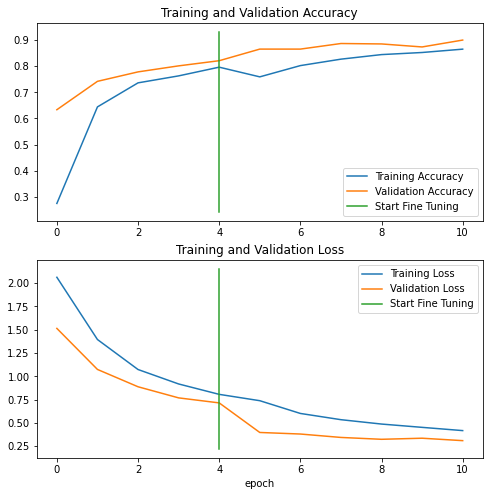

In [150]:
# how Did Fine Tuning Go With More Data

compare_historys(original_history = history_10_percent_data_aug,
                 new_history = history_fine_10_classes_full,
                 inital_epochs=5
                 )

# **Comparing Our Model's Experiment Results**

**Viewing On Experiment Data On TensorBoard**

**Upload tensorBoard Records**


In [151]:
! tensorboard dev upload --logdir ./Transfer_Learning/ \
  --name 'Transfer Learning Experiments With 10 Food 101 Classes' \
  --description 'A Series Of Different Classes  Transfer Learning Experiments With Varying Amount of Data And Fine Tuning' \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Transfer_Learning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=C4niZoNAAo3ZUrRDsoY2XhbWRHgYxZ&prompt=consent&access_type=

In [152]:
# How To View And Delete Tensorboard Dev Experiments

! tensorboard dev list


https://tensorboard.dev/experiment/9q6E9VzERlafMbqYUKuBbQ/
	Name                 Transfer Learning Experiments With 10 Food 101 Classes
	Description          A Series Of Different Classes  Transfer Learning Experiments With Varying Amount of Data And Fine Tuning
	Id                   9q6E9VzERlafMbqYUKuBbQ
	Created              2022-02-22 20:54:39 (1 minute ago)
	Updated              2022-02-22 20:54:50 (54 seconds ago)
	Runs                 22
	Tags                 5
	Scalars              348
	Tensor bytes         0
	Binary object bytes  9543849
https://tensorboard.dev/experiment/xOocZTZGTJ26yQckH7qSEQ/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Compairing Two Different Tf Hub Feature Extraction Model Architecture Using 10% of Model Data
	Id                   xOocZTZGTJ26yQckH7qSEQ
	Created              2022-02-18 11:15:40
	Updated              2022-02-18 11:15:41
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes      

# **This Is The End Of Transfer Learning Fine Tuning**